## Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import cv2
from tensorflow.keras.preprocessing import image
from sklearn.metrics import classification_report

In [2]:
tf.__version__

'2.9.1'

## Importiing Dataset

In [3]:
mnist = keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
X_train.dtype

dtype('uint8')

In [6]:
y_train.dtype

dtype('uint8')

### Plotting a Figure

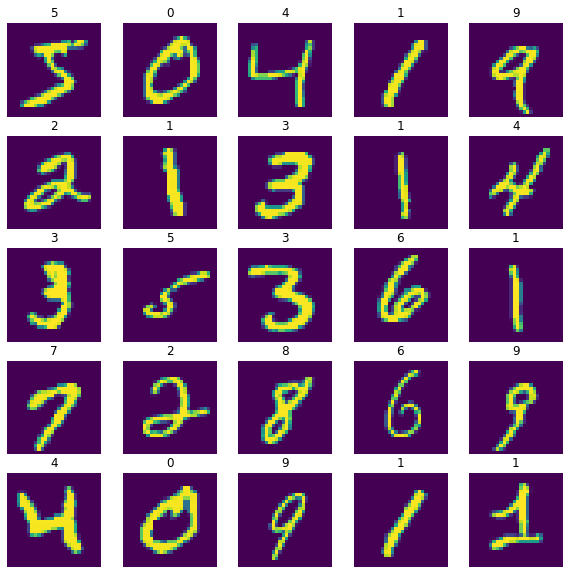

In [7]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.axis('off')
    plt.title(y_train[i])
    plt.imshow(X_train[i])

## Feature Scaling

In [8]:
X_train = keras.utils.normalize(X_train, axis=1)
X_test = keras.utils.normalize(X_test, axis=1)

## Building a Deep Neural Net 

In [9]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

## Compiling the Neural Net

In [10]:
model.compile(optimizer='adam', loss="sparse_categorical_crossentropy", metrics=["accuracy"])

## Training the Model

In [11]:
history = model.fit(X_train, y_train, epochs=50, )

Epoch 1/50
1875/1875 [==============================] - 4s 1ms/step - loss: 0.2620 - accuracy: 0.9235
Epoch 2/50
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1078 - accuracy: 0.9665
Epoch 3/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0731 - accuracy: 0.9767
Epoch 4/50
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0529 - accuracy: 0.9830
Epoch 5/50
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0386 - accuracy: 0.9877
Epoch 6/50
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0319 - accuracy: 0.9891
Epoch 7/50
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0251 - accuracy: 0.9916
Epoch 8/50
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0197 - accuracy: 0.9933
Epoch 9/50
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0180 - accuracy: 0.9939
Epoch 10/50
1875/1875 [==============================] - 3s 1ms/step - loss: 0.014

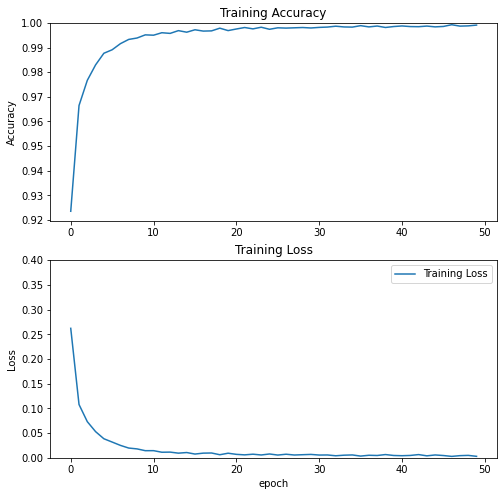

In [12]:
acc = history.history['accuracy']
loss = history.history['loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.legend(loc='upper right')
plt.ylabel('Loss')
plt.ylim([0,0.4])
plt.title('Training Loss')
plt.xlabel('epoch')
plt.show()

In [13]:
p = model.predict(X_test)
predictions = np.argmax(p, axis=1)
predictions

313/313 [==============================] - 1s 2ms/step


array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [17]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.97      0.98      1032
           3       0.99      0.97      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.96      0.97      0.97       892
           6       0.97      0.98      0.98       958
           7       0.97      0.98      0.98      1028
           8       0.97      0.96      0.97       974
           9       0.96      0.98      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

